## Importing Libraries :

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Functions Defenition :

In [60]:
def new_figure () :
    fig = plt.figure(figsize=(40,40))
    ax = plt.axes(projection='3d')
    ax.set_xlabel('X', size=40)
    ax.set_ylabel('Y', size=40)
    ax.set_zlabel('Z', size=40)
    ax.set_xlim3d(-2, 1.2)
    ax.set_ylim3d(1, 7)
    ax.set_zlim3d(0, 1.7)
    return fig, ax

In [61]:
def data_to_df (data, temps) :
    l=data.shape[1]
    datax=[]; datay=[]; dataz=[]
    for i in range (1,l,3):
        datax.append(data.loc[:,data.columns[i]][temps])  #extract all the x's from the first column and store them in datax list
        datay.append(data.loc[:,data.columns[i+1]][temps])  #extract all the y's from the first column and store them in datay list
        dataz.append(data.loc[:,data.columns[i+2]][temps])  #extract all the z's from the first column and store them in dataz list
    ar=np.array([datax,datay,dataz])
    df = pd.DataFrame(ar, index = ['x', 'y', 'z'], columns = ['Pelvis','L5','L3','T12','T8','Neck','Head','Right Shoulder','Right Upper Arm','Right Forearm','Right Hand','Left Shoulder','Left Upper Arm','Left Forearm','Left Hand','Right Upper Leg','Right Lower Leg','Right Foot','Right Toe','Left Upper Leg','Left Lower Leg','Left Foot','Left Toe'])
    return df

In [62]:
def plot_all_sensors_with_names (data,ax):
    nb_sensors = len(data.columns)
    for i in range (0,nb_sensors):
        sensor_name = data.columns[i]
        x=data.loc[:,sensor_name][0]
        y=data.loc[:,sensor_name][1]
        z=data.loc[:,sensor_name][2]
        ax.scatter(x,y,z,s=200, marker='d', color="g")
        ax.text(x,y,z,'%s' % (sensor_name), size=20, zorder=1,)

In [63]:
def plot_all_sensors_with_numbers (data,ax):
    nb_sensors = len(data.columns)
    for i in range (0,nb_sensors):
        sensor_name = data.columns[i]
        x=data.loc[:,sensor_name][0]
        y=data.loc[:,sensor_name][1]
        z=data.loc[:,sensor_name][2]
        ax.scatter(x,y,z,s=200, marker='d', color="g")
        ax.text(x,y,z, '%s''%s' % ('  ',i+1), size=15, zorder=1,)

In [64]:
def plot_all_segments(data,ax) :
    for i in range (0,len(segments_right)) :
        ax.plot(data.loc[:,segments_right[i]].loc['x',:],data.loc[:,segments_right[i]].loc['y',:],data.loc[:,segments_right[i]].loc['z',:], color="b")
    for i in range (0,len(segments_left)) :
        ax.plot(data.loc[:,segments_left[i]].loc['x',:],data.loc[:,segments_left[i]].loc['y',:],data.loc[:,segments_left[i]].loc['z',:], color="r")
    for i in range (0,len(segments_axial)) :
        ax.plot(data.loc[:,segments_axial[i]].loc['x',:],data.loc[:,segments_axial[i]].loc['y',:],data.loc[:,segments_axial[i]].loc['z',:], color="k")

In [65]:
def plot_head (data,ax,temps) :
    x_head = data.loc[:,'Head x'][temps]
    y_head = data.loc[:,'Head y'][temps]
    z_head = data.loc[:,'Head z'][temps]
    ax.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")

# Reading movement stairs data :

In [66]:
data=pd.read_excel('Pilot_006_JeEy_Stairs.xlsx', sheet_name ="Segment Position")
data

,Frame,Pelvis x,Pelvis y,Pelvis z,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
0,0,-1.461969,4.740198,0.926992,-1.445902,4.716697,1.016530,-1.442894,4.719014,1.108954,...,0.931351,-1.521471,4.753672,0.473240,-1.497906,4.748197,0.129988,-1.517658,4.901785,0.040812
1,1,-1.461945,4.740310,0.926949,-1.445505,4.717340,1.016554,-1.442419,4.719769,1.108973,...,0.931427,-1.521438,4.753192,0.473359,-1.498051,4.748225,0.130089,-1.517637,4.901881,0.040965
2,2,-1.461920,4.740423,0.926907,-1.445109,4.717982,1.016577,-1.441944,4.720523,1.108991,...,0.931503,-1.521405,4.752711,0.473478,-1.498195,4.748253,0.130190,-1.517616,4.901978,0.041118
3,3,-1.461924,4.740518,0.926867,-1.444765,4.718567,1.016595,-1.441523,4.721208,1.109003,...,0.931568,-1.521398,4.752229,0.473582,-1.498338,4.748252,0.130278,-1.517591,4.902036,0.041248
4,4,-1.461961,4.740599,0.926830,-1.444493,4.719080,1.016604,-1.441174,4.721802,1.109007,...,0.931617,-1.521424,4.751739,0.473662,-1.498473,4.748202,0.130346,-1.517559,4.902028,0.041339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,4649,0.641050,1.924677,0.917584,0.611195,1.920971,1.006590,0.608384,1.917217,1.098974,...,0.924843,0.719564,1.964923,0.470901,0.686693,1.934932,0.129712,0.844845,1.946375,0.042104
4650,4650,0.656167,1.920991,0.919862,0.626703,1.917794,1.009020,0.624317,1.914088,1.101417,...,0.926515,0.725278,1.962492,0.471205,0.687046,1.934577,0.130368,0.845713,1.947219,0.042181
4651,4651,0.671295,1.917800,0.921807,0.642222,1.915094,1.011107,0.640255,1.911388,1.103513,...,0.927845,0.729563,1.959477,0.471363,0.687387,1.934001,0.130787,0.846023,1.947347,0.042278
4652,4652,0.686314,1.914825,0.923551,0.657651,1.912635,1.012996,0.656113,1.908916,1.105409,...,0.928929,0.732954,1.956060,0.471455,0.687730,1.933281,0.131103,0.846100,1.947163,0.042387


In [67]:
columns= data.columns
columns

Index(['Frame', 'Pelvis x', 'Pelvis y', 'Pelvis z', 'L5 x', 'L5 y', 'L5 z',
       'L3 x', 'L3 y', 'L3 z', 'T12 x', 'T12 y', 'T12 z', 'T8 x', 'T8 y',
       'T8 z', 'Neck x', 'Neck y', 'Neck z', 'Head x', 'Head y', 'Head z',
       'Right Shoulder x', 'Right Shoulder y', 'Right Shoulder z',
       'Right Upper Arm x', 'Right Upper Arm y', 'Right Upper Arm z',
       'Right Forearm x', 'Right Forearm y', 'Right Forearm z', 'Right Hand x',
       'Right Hand y', 'Right Hand z', 'Left Shoulder x', 'Left Shoulder y',
       'Left Shoulder z', 'Left Upper Arm x', 'Left Upper Arm y',
       'Left Upper Arm z', 'Left Forearm x', 'Left Forearm y',
       'Left Forearm z', 'Left Hand x', 'Left Hand y', 'Left Hand z',
       'Right Upper Leg x', 'Right Upper Leg y', 'Right Upper Leg z',
       'Right Lower Leg x', 'Right Lower Leg y', 'Right Lower Leg z',
       'Right Foot x', 'Right Foot y', 'Right Foot z', 'Right Toe x',
       'Right Toe y', 'Right Toe z', 'Left Upper Leg x', 'Left Upper Leg

## Preparing 3 arrays : 
1. segments_right contains the segments of the right limbs 
2. segments_left contains the segments of the left limbs 
3. segments_axial contains the segments of the axial part

In [68]:
segments_right=np.array([['Neck', 'Right Shoulder'],['Right Upper Arm', 'Right Shoulder'],['Right Forearm','Right Hand'],['Right Forearm','Right Upper Arm'],['Right Upper Leg', 'Right Lower Leg'],['Right Upper Leg', 'Pelvis'],['Right Foot', 'Right Lower Leg'],['Right Foot', 'Right Toe']])
segments_left=np.array([['Left Forearm','Left Hand'],['Left Forearm','Left Upper Arm'],['Neck', 'Left Shoulder'],['Left Upper Arm', 'Left Shoulder'],['Left Upper Leg', 'Pelvis'],['Left Foot', 'Left Lower Leg'],['Left Foot', 'Left Toe'],['Left Upper Leg', 'Left Lower Leg']])
segments_axial=np.array([['Neck', 'Head'],['T8', 'Neck'],['T12', 'T8'],['L3', 'T12'],['L3', 'L5'],['L5', 'Pelvis']])

In [69]:
print('segments_right :')
print(segments_right)
print('\nsegments_left :')
print(segments_left)
print('\nsegments_axial :')
print(segments_axial)

segments_right :
[['Neck' 'Right Shoulder']
 ['Right Upper Arm' 'Right Shoulder']
 ['Right Forearm' 'Right Hand']
 ['Right Forearm' 'Right Upper Arm']
 ['Right Upper Leg' 'Right Lower Leg']
 ['Right Upper Leg' 'Pelvis']
 ['Right Foot' 'Right Lower Leg']
 ['Right Foot' 'Right Toe']]

segments_left :
[['Left Forearm' 'Left Hand']
 ['Left Forearm' 'Left Upper Arm']
 ['Neck' 'Left Shoulder']
 ['Left Upper Arm' 'Left Shoulder']
 ['Left Upper Leg' 'Pelvis']
 ['Left Foot' 'Left Lower Leg']
 ['Left Foot' 'Left Toe']
 ['Left Upper Leg' 'Left Lower Leg']]

segments_axial :
[['Neck' 'Head']
 ['T8' 'Neck']
 ['T12' 'T8']
 ['L3' 'T12']
 ['L3' 'L5']
 ['L5' 'Pelvis']]


# Visualising movement stairs data :

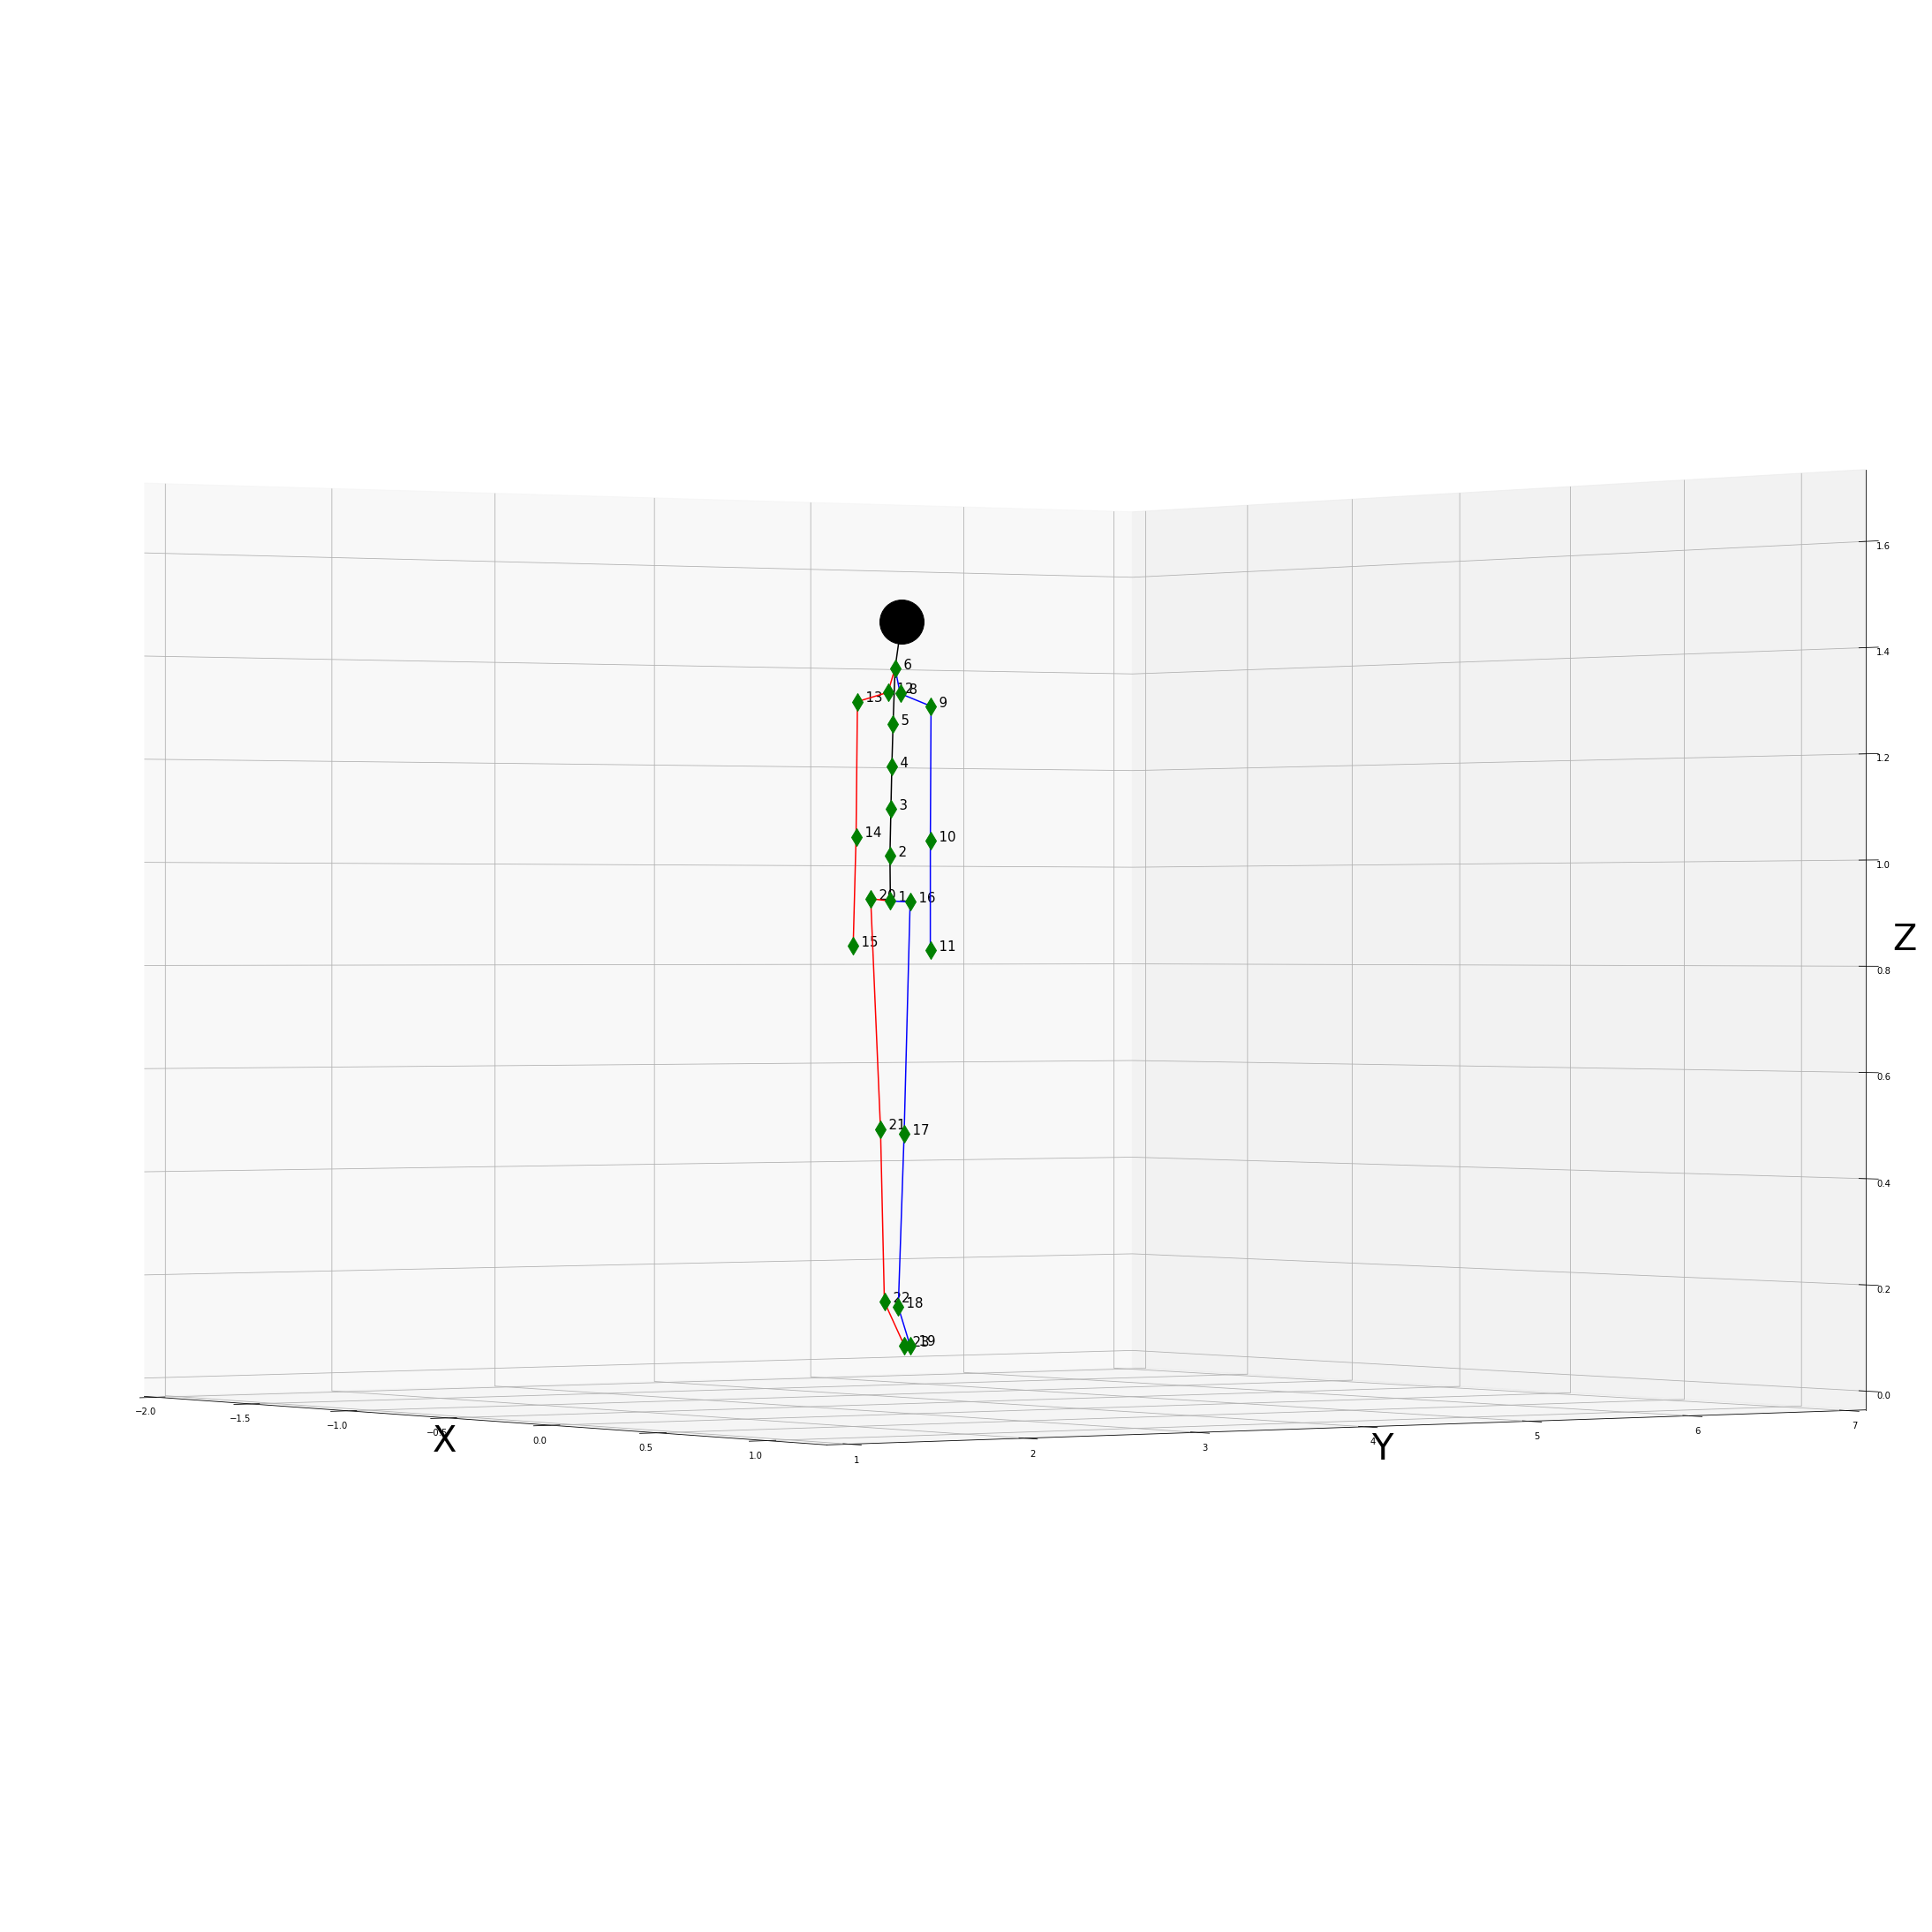

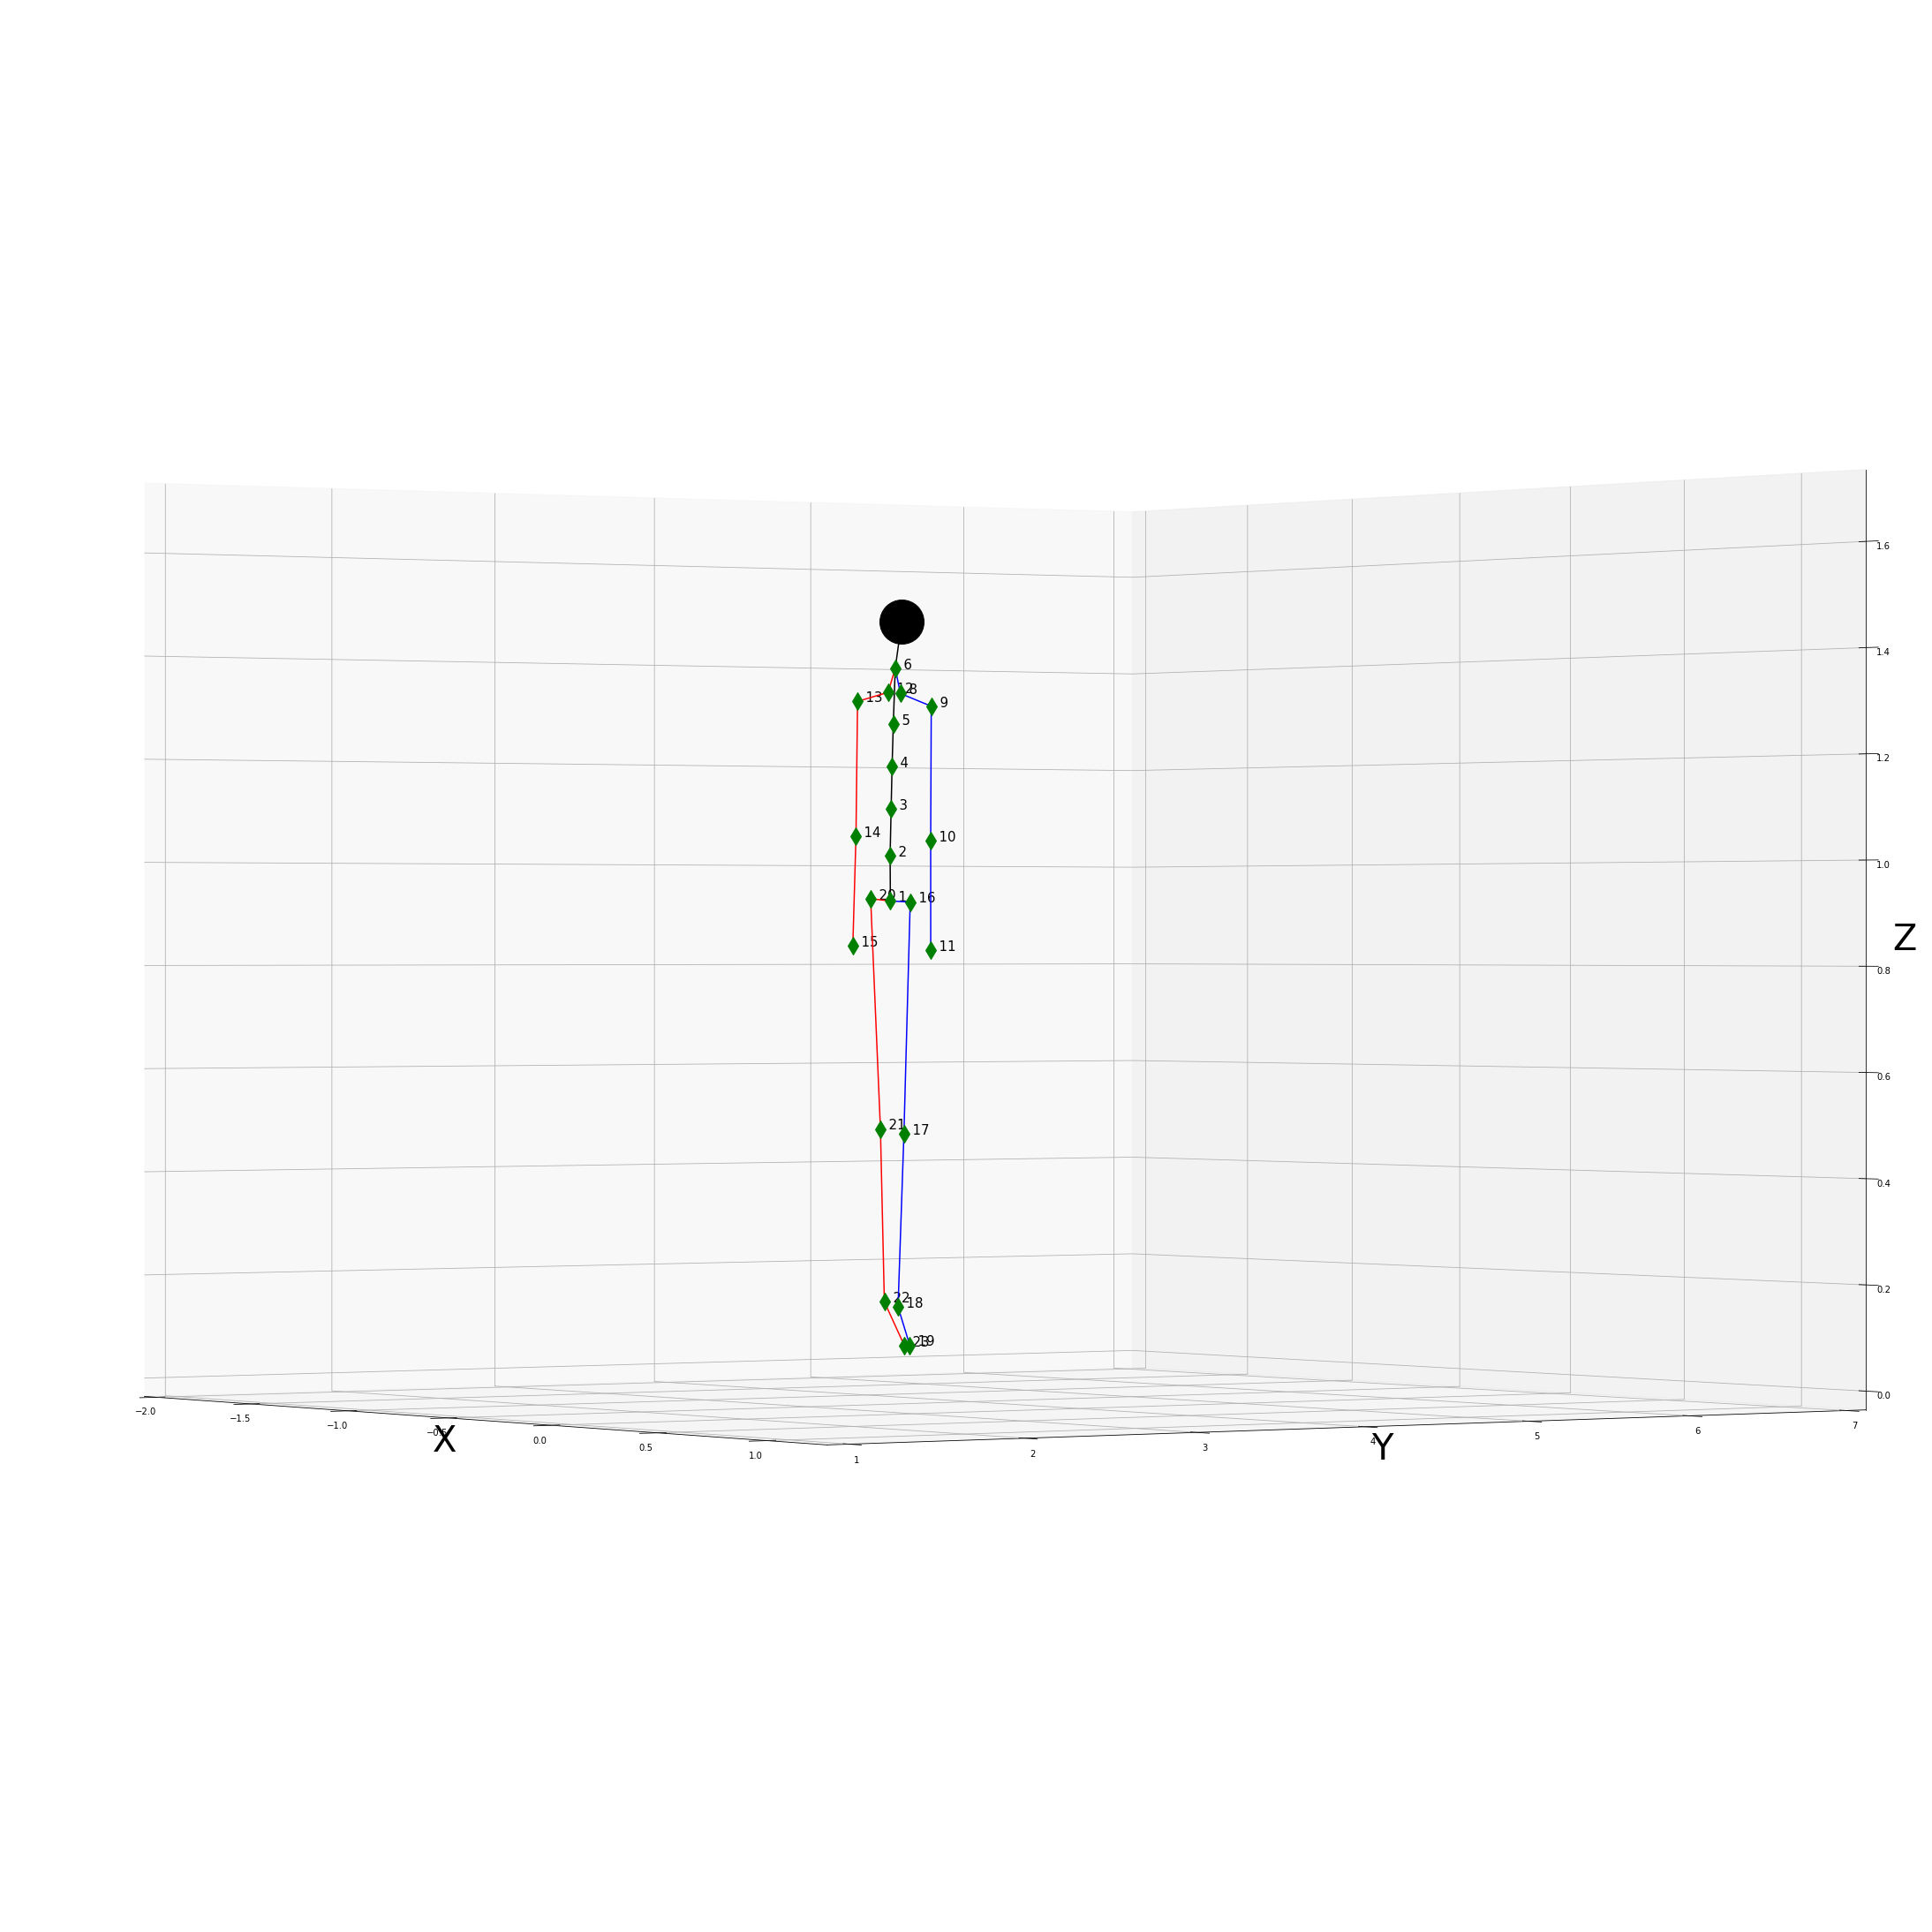

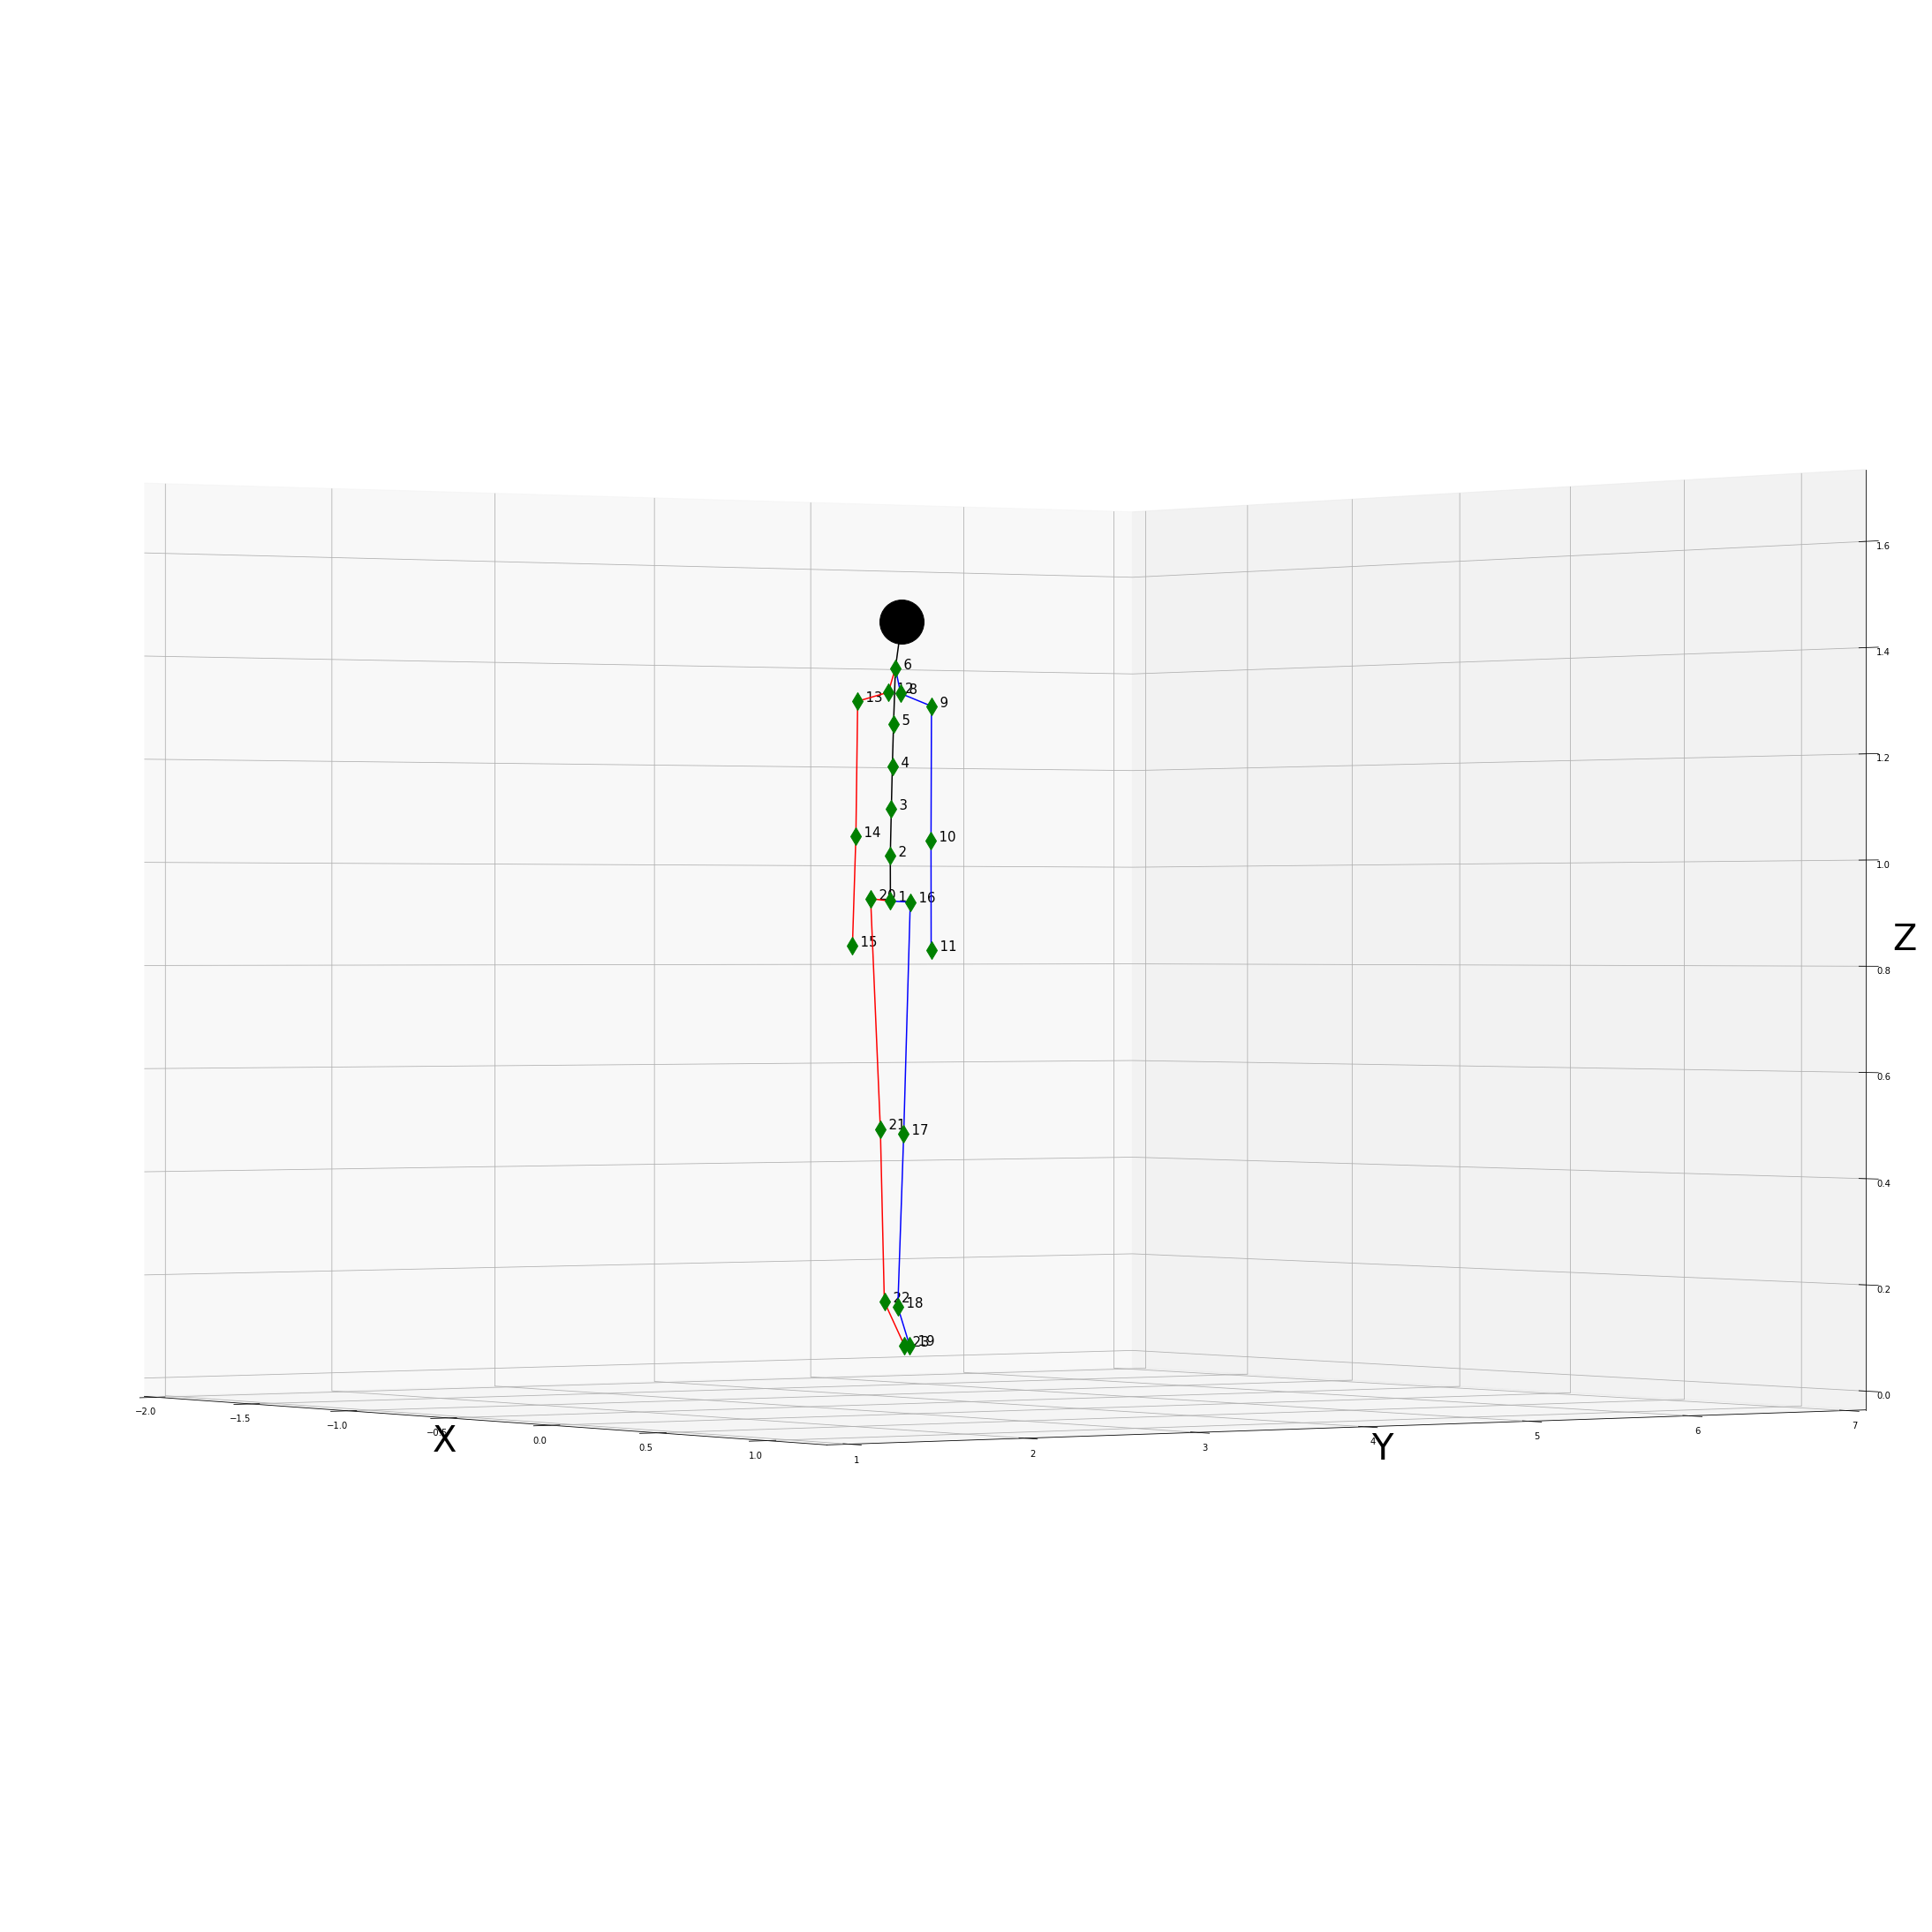

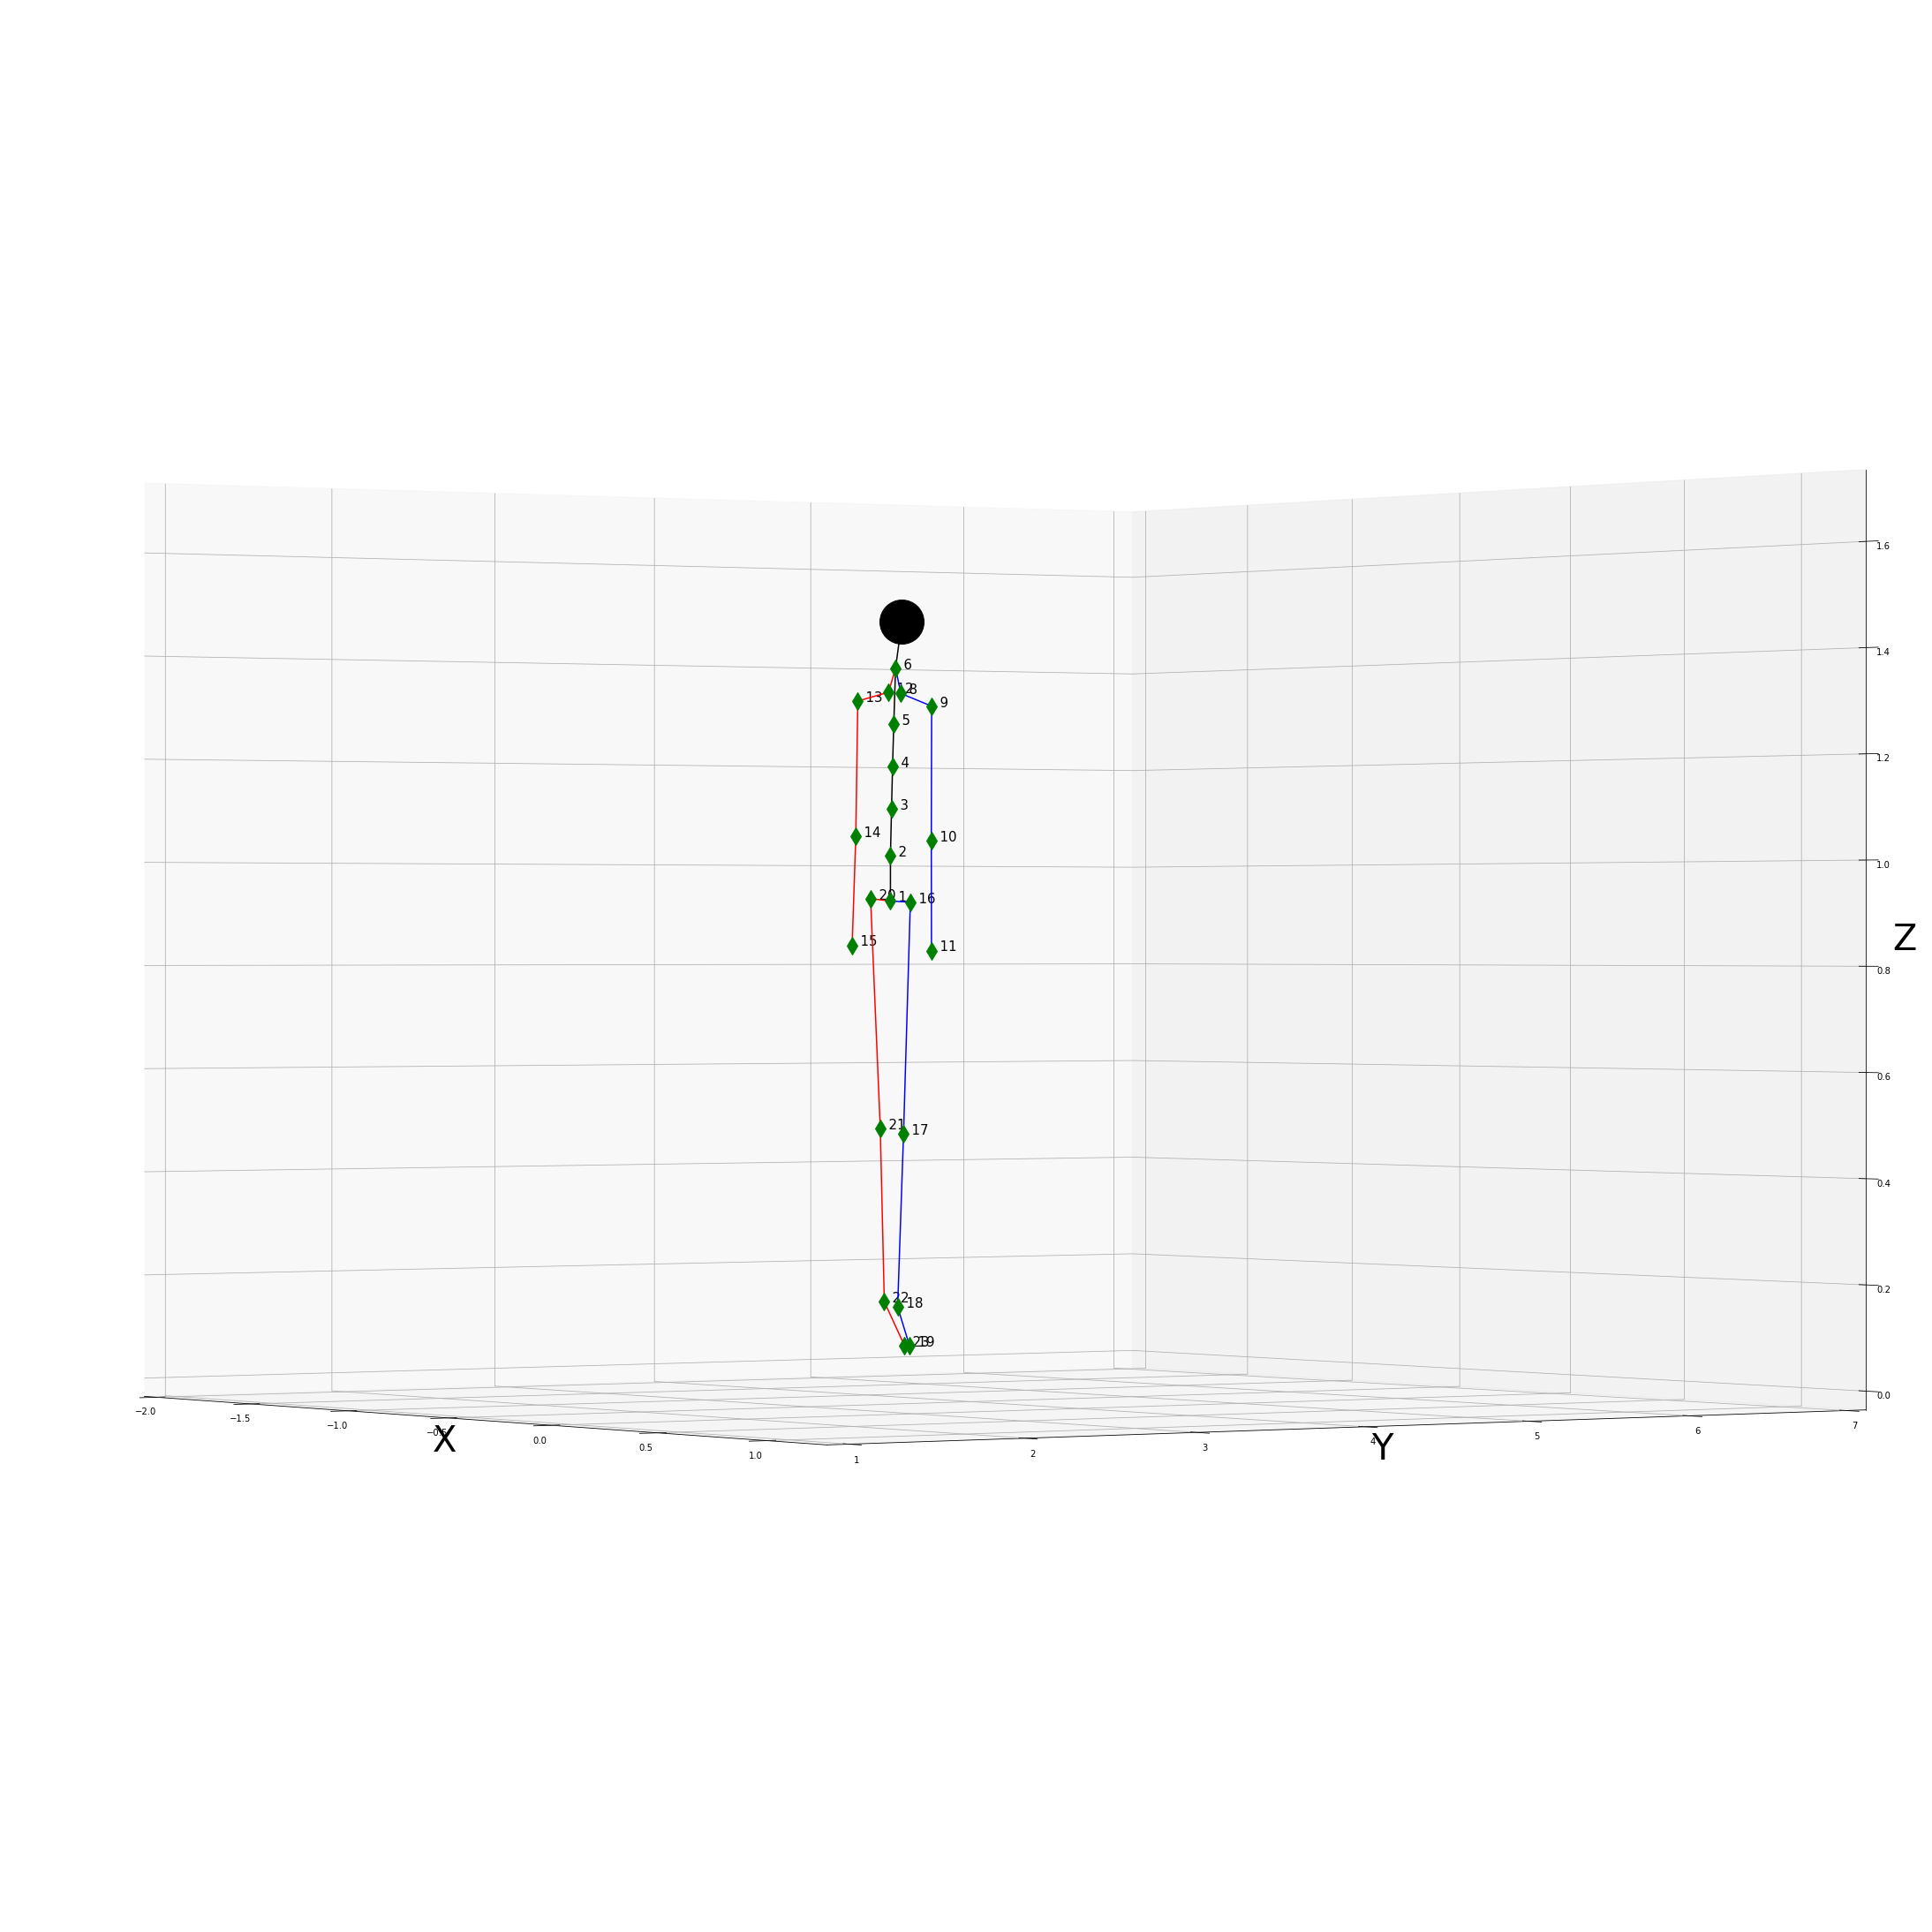

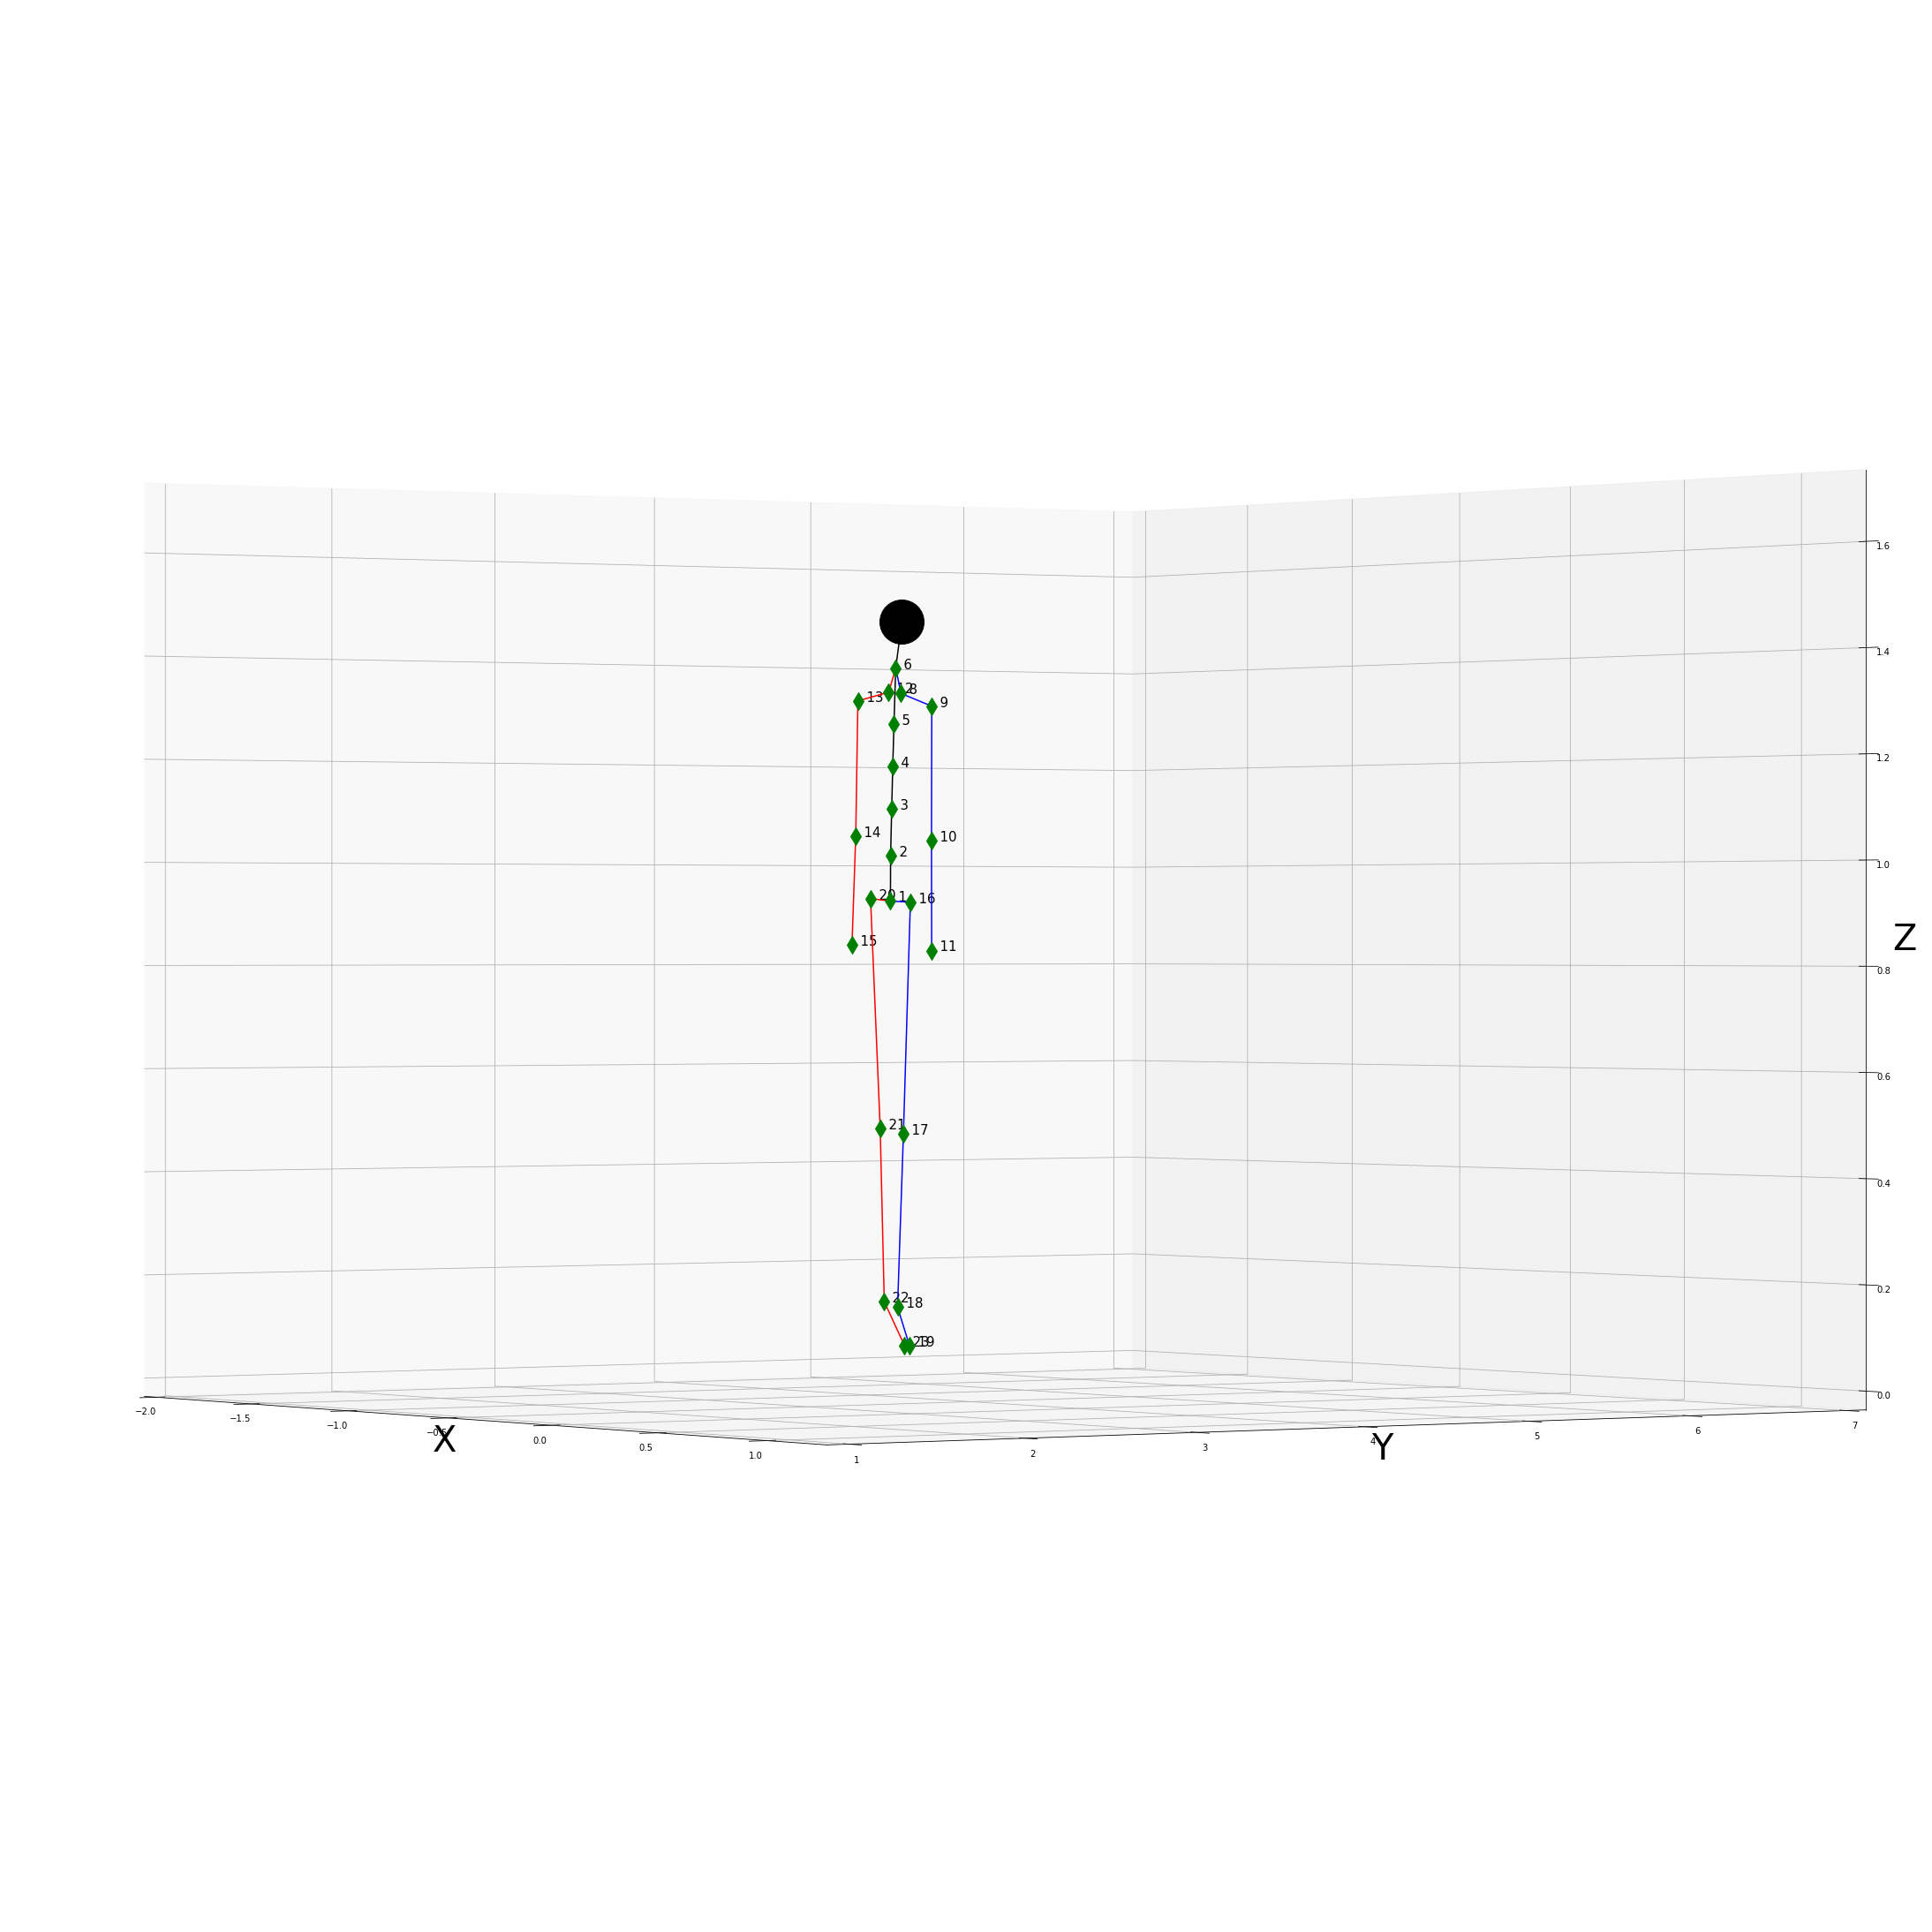

In [70]:
l=data.shape[0]
for i in range (l) :
    df= data_to_df (data, i)
    fig, ax = new_figure()
    plot_all_sensors_with_numbers(df,ax)
    plot_all_segments(df,ax)
    ax.view_init(0, -35)
    plot_head (data,ax,i)
    s= str (i)
    fig.savefig(s,dpi=500)